In [263]:
%config IPCompleter.greedy=True #enable auto complete


# Iris classification
Explore the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) and try some classifiers to predict the species of an iris.
![iris callsification image](http://suruchifialoke.com/img/ML/iris.png)



#### Let's first import our dependencies and load the iris data


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from pandas.plotting import parallel_coordinates,scatter_matrix


In [2]:
#load iris dataset form the standard datasets provided in the sklearn library
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
df['target']=pd.Categorical.from_codes(iris.target, iris.target_names)

### Explore and visualize the data

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1bff46a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fed1be31c88>]], dtype=object)

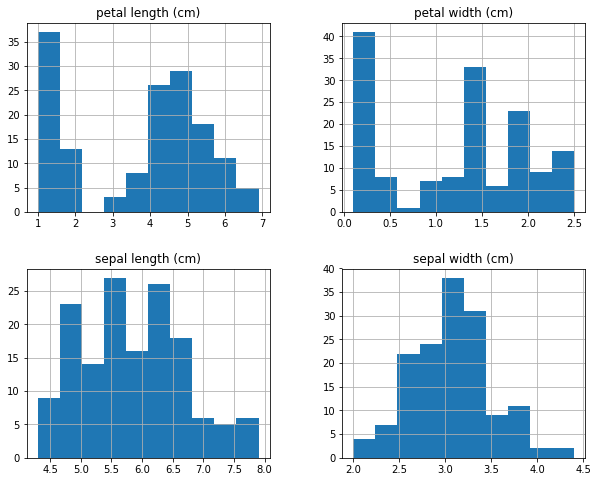

In [5]:
#examine the distribution of the different feature columns
df.hist(figsize = (10,8), stacked= False)
#atrenative harder method
# for feature in df.columns:
#     if feature != 'target':
#         plt.figure()
#         plt.xlabel(feature)
#         df[feature].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1bbdb8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fed1ad09128>]], dtype=object)

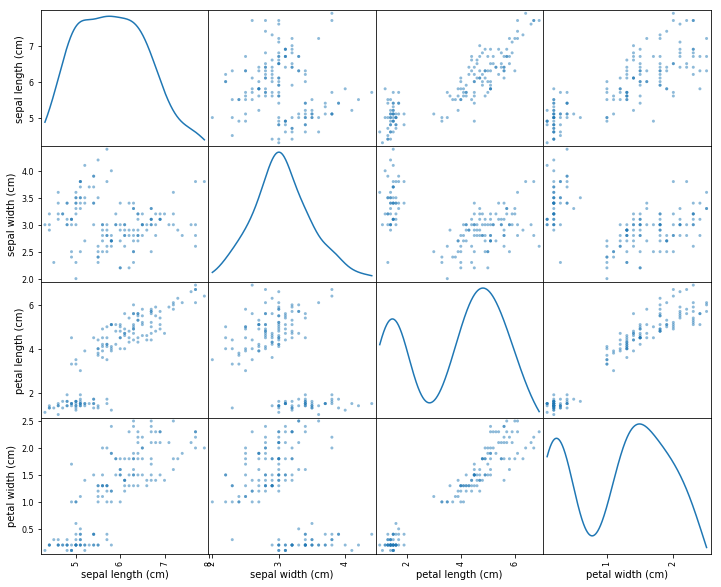

In [6]:
#scatter plots
plt.figure()
scatter_matrix(df, figsize=(12,10),diagonal='kde')

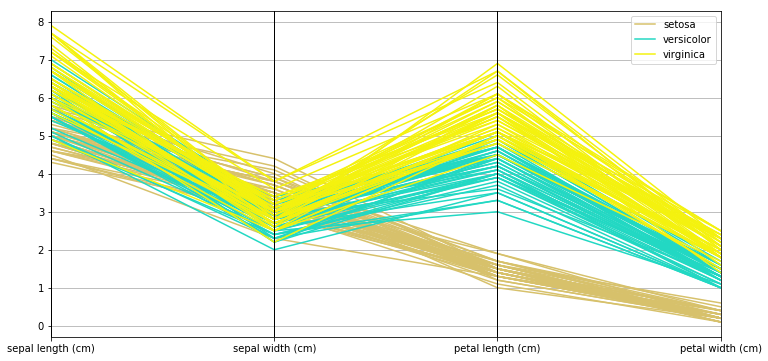

In [7]:
plt.figure(figsize = (12,6))
parallel_coordinates(df,'target')

We can see from the parallel coordinates plot above that the species can be easily deduced from the petal lenght and petal width as the data points from the 3 classes are nicely separated when it comes to these attributes

### Split the data into features and labels , training and testing

In [8]:
X = df.iloc[:,0:4] # feature vector
Y = df['target'] # labels 
#split into training and testing
X_train , X_test, Y_train , Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

### Try different classifiers

> **Decision tree**

In [182]:
#Initialize the model
clf = tree.DecisionTreeClassifier(min_samples_leaf=2 , criterion = 'gini')
#train it
clf.fit(X_train,Y_train)
#test it on test data
Y_pred = clf.predict(X_test)


#### Evaluate the model

#### Quick reminder (for me) :
* **Accuracy** = nb of **correct predictions** made / **total nb of predictions** made.
* **Recall** = tp / (tp + fn) ----->The ability of the classifier not to label as **negative** a sample that is **positive**.
* **Precision** = tp / (tp + fp)-----> The ability of the classifier not to label as **positive** a sample that is **negative**.

In [183]:
#accuracy
print(f'Accuracy of decision tree: {accuracy_score(Y_test,Y_pred)*100}%')

Accuracy of decision tree: 98.0%


In [48]:
#classification report
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       0.94      1.00      0.97        15
  virginica       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        50



In [37]:
#confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

Labels in the confusion matrix are organized in this order:

In [50]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


> **Multi Layer Perceptron**

In [262]:
%%time
#Initialize the model
#1 hidden layer with 10 neurons and relu activation function.We set a random state for reproductibility and batch_size to 10 
#for faster learning.
#We use sgd(stochastic gradient descent) algorithm to update the weights
mlp = MLPClassifier(hidden_layer_sizes=(10),max_iter=200,random_state=42,verbose=False,solver='sgd',batch_size=10)
#train it
mlp.fit(X_train,Y_train)
#test it
Y_pred = mlp.predict(X_test)
#accuracy
print(f'Accuracy of neural network: {accuracy_score(Y_test,Y_pred)*100}%')

Accuracy of neural network: 98.0%
CPU times: user 773 ms, sys: 0 ns, total: 773 ms
Wall time: 773 ms


The training loss function converges after about 150 iterations(with the hyperparameters above)

In [260]:
#classification report
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      0.93      0.97        15
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        50



In [243]:
#confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]])

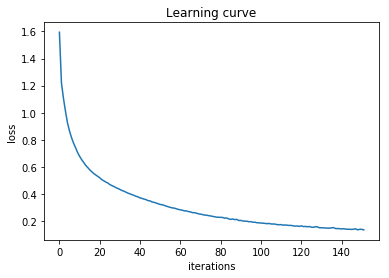

In [258]:
#plot the learning curve for the mlp: loss as a function of the nb of iterations
plt.figure()
plt.xlabel("iterations")
plt.ylabel('loss')
plt.title('Learning curve')
plt.plot(mlp.loss_curve_)

Both models have the same **98% accuracy**, however confusion matrices are different.1 data point is not correctly classified in both cases but not the same one.